In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import json
%matplotlib inline

In [2]:
# Import Train and Test Data 
logins = '/Users/Administrator/Desktop/'
#i = pd.date_range('2018-04-09', periods=15)
loginsf =  pd.read_json(logins + 'logins.json') 
loginsdf = pd.DataFrame(loginsf)
loginsdf
#how many times each interval (duplicates)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


First , exploring this dataset if I have missing values and if I need to clean it.

In [3]:
#info about the dataset
loginsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
#how many rows and columns
loginsdf.shape

(93142, 1)

Just to have a common sense about the dataset

In [5]:
#statistics
loginsdf.describe().T

,count,unique,top,freq,first,last
login_time,93142,92265,1970-02-12 11:16:53,3,1970-01-01 20:12:16,1970-04-13 18:57:38


In [6]:
#minimum value
loginsdf.min()

login_time   1970-01-01 20:12:16
dtype: datetime64[ns]

Aggregate these login counts based on 15­minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand

In [3]:
#setting index
loginset = loginsdf.set_index('login_time')
loginset

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21
...
1970-04-13 18:50:19
1970-04-13 18:43:56
1970-04-13 18:54:02


In [4]:
#convert data to datetime datatype
loginset.index = pd.to_datetime(loginset.index, unit='min')

In [5]:
#rounding minutes to 15 mins intervals
loginset.index.round("15min")

DatetimeIndex(['1970-01-01 20:15:00', '1970-01-01 20:15:00',
               '1970-01-01 20:15:00', '1970-01-01 20:15:00',
               '1970-01-01 20:30:00', '1970-01-01 20:15:00',
               '1970-01-01 20:15:00', '1970-01-01 20:30:00',
               '1970-01-01 20:30:00', '1970-01-01 20:45:00',
               ...
               '1970-04-13 18:30:00', '1970-04-13 18:45:00',
               '1970-04-13 18:45:00', '1970-04-13 18:45:00',
               '1970-04-13 18:45:00', '1970-04-13 18:45:00',
               '1970-04-13 18:45:00', '1970-04-13 19:00:00',
               '1970-04-13 19:00:00', '1970-04-13 19:00:00'],
              dtype='datetime64[ns]', name='login_time', length=93142, freq=None)

In [6]:
# name a new dataframe
roundedtime = loginset.index.round("15min")

In [7]:
#count duplicates total
roundedtime.duplicated().sum()

83766

login counts based on 15­minute time intervals

visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand

(array([3321., 4294., 3235., 3443., 3690., 3723., 3030., 4511., 4719.,
        4908., 4451., 5233., 6078., 4607., 6432., 6115., 5787., 4767.,
        5530., 5268.]),
 array([719163.84375   , 719168.94114583, 719174.03854167, 719179.1359375 ,
        719184.23333333, 719189.33072917, 719194.428125  , 719199.52552083,
        719204.62291667, 719209.7203125 , 719214.81770833, 719219.91510417,
        719225.0125    , 719230.10989583, 719235.20729167, 719240.3046875 ,
        719245.40208333, 719250.49947917, 719255.596875  , 719260.69427083,
        719265.79166667]),
 <a list of 20 Patch objects>)

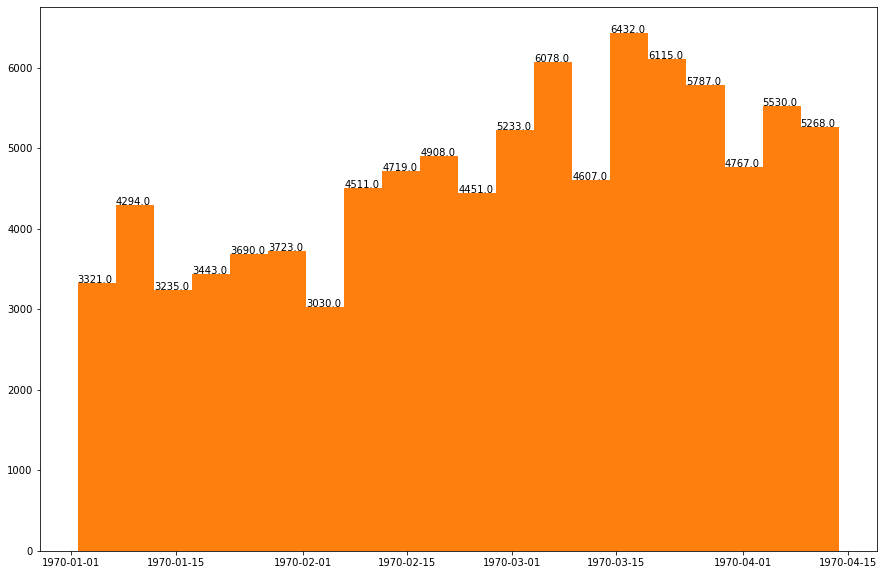

In [18]:
# count plot
fig = plt.figure(figsize = (15,10))
your_bins=20
arr=plt.hist(roundedtime.T, bins=your_bins)
for i in range(your_bins):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i]))
plt.hist(roundedtime.T, bins=20)

this count plot as a solution unveils time of the demand based on my data and it is between 1970-03-01 and 1970-04-1

In [27]:
loginsdf['date'] = loginsdf['login_time'].dt.date


In [10]:
#print("Created at %s" % (roundedtime.minute))

Created at Int64Index([15, 15, 15, 15, 30, 15, 15, 30, 30, 45,
            ...
            30, 45, 45, 45, 45, 45, 45,  0,  0,  0],
           dtype='int64', name='login_time', length=93142)


In [11]:
#extracting minutes only from my data
loginset['mins'] = roundedtime.minute

In [28]:
loginset['date'] = roundedtime.date

In [29]:
#transpose
loginset.T

login_time,1970-01-01 20:13:18,1970-01-01 20:16:10,1970-01-01 20:16:37,1970-01-01 20:16:36,1970-01-01 20:26:21,1970-01-01 20:21:41,1970-01-01 20:12:16,1970-01-01 20:35:47,1970-01-01 20:35:38,1970-01-01 20:47:52,...,1970-04-13 18:36:53,1970-04-13 18:40:31,1970-04-13 18:46:06,1970-04-13 18:40:40,1970-04-13 18:48:52,1970-04-13 18:50:19,1970-04-13 18:43:56,1970-04-13 18:54:02,1970-04-13 18:57:38,1970-04-13 18:54:23
mins,15,15,15,15,30,15,15,30,30,45,...,30,45,45,45,45,45,45,0,0,0
date,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,1970-01-01,...,1970-04-13,1970-04-13,1970-04-13,1970-04-13,1970-04-13,1970-04-13,1970-04-13,1970-04-13,1970-04-13,1970-04-13


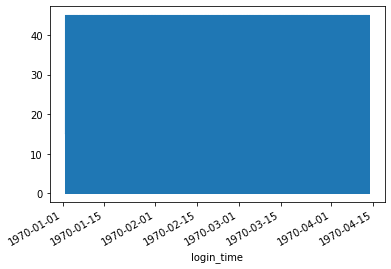

In [32]:
#plot time series
loginset['mins'].plot(linewidth=0.5);

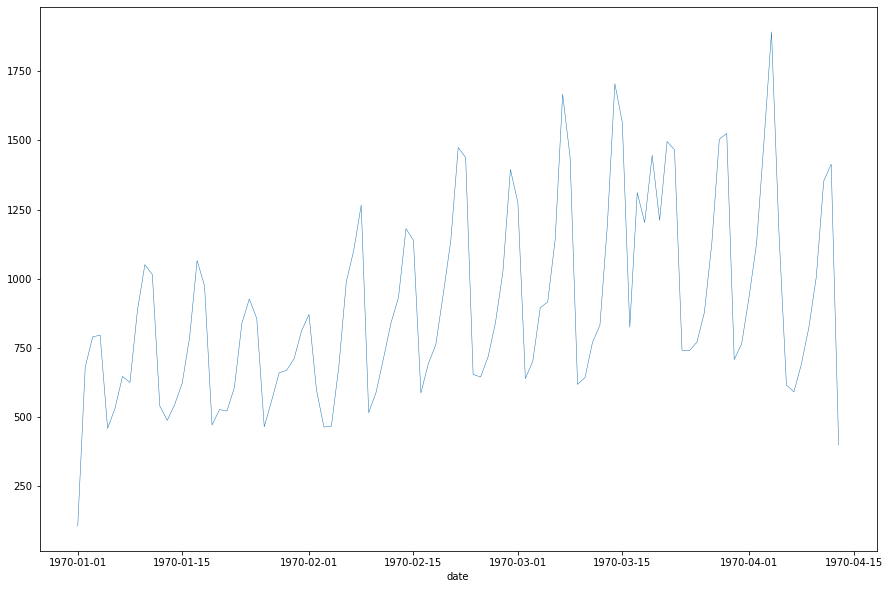

In [34]:
#plot time series
fig = plt.figure(figsize = (15,10))
loginset.groupby('date')['mins'].agg('count').plot(linewidth=0.5);

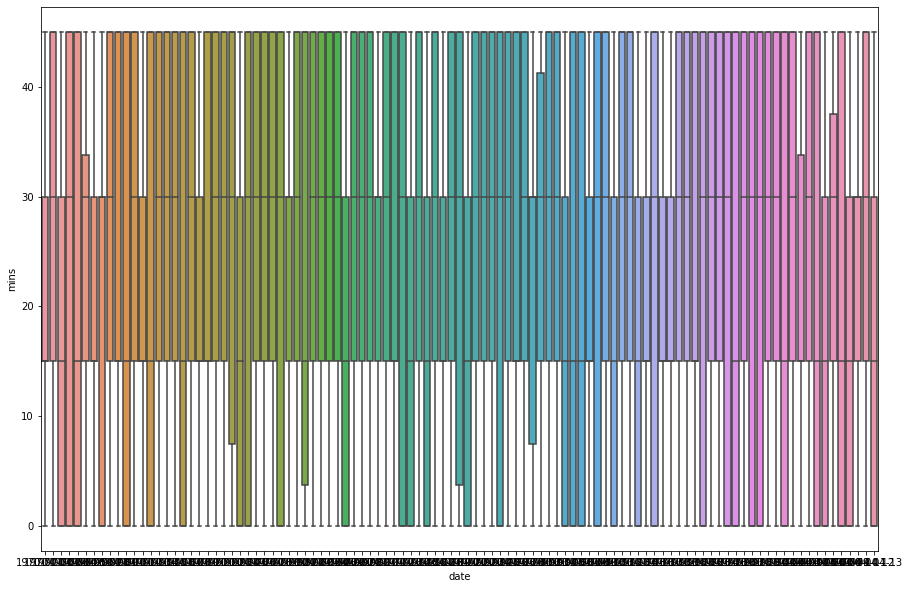

In [68]:
#seasonality
fig = plt.figure(figsize = (15,10))
sns.boxplot(data=loginset, x='date', y='mins');

In [38]:
opsd_7d =  loginset.rolling(7, center=True).mean()
opsd_7d.head(10)

,mins
login_time,
1970-01-01 20:13:18,NaN
1970-01-01 20:16:10,NaN
1970-01-01 20:16:37,NaN
1970-01-01 20:16:36,17.142857
1970-01-01 20:26:21,19.285714
1970-01-01 20:21:41,21.428571
1970-01-01 20:12:16,25.714286
1970-01-01 20:35:47,27.857143
1970-01-01 20:35:38,27.857143


<Figure size 1080x720 with 0 Axes>

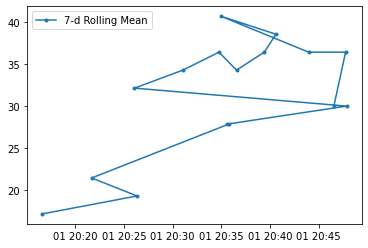

In [43]:
fig = plt.figure(figsize = (15,10))
# Start and end of the date range to extract
start, end = '1970-01-01 20:16:36', '1970-01-01 20:47:52'
# Plot daily, weekly resampled, and 7-day rolling mean time series together
fig, ax = plt.subplots()
ax.plot(opsd_7d.loc[start:end, 'mins'],
marker='.', linestyle='-', label='7-d Rolling Mean')
ax.set_ylabel('')
ax.legend();

In [45]:
opsd_365d = loginset.rolling(window=365, center=True, min_periods=360).mean()

<Figure size 1080x1440 with 0 Axes>

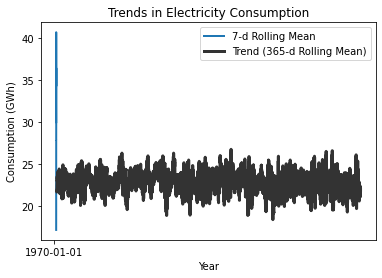

In [54]:
import matplotlib.dates as mdates
fig = plt.figure(figsize = (15,20))
# Plot daily, 7-day rolling mean, and 365-day rolling mean time series
fig, ax = plt.subplots()
start, end = '1970-01-01 20:16:36', '1970-01-01 20:47:52'
ax.plot(opsd_7d.loc[start:end, 'mins'], linewidth=2, label='7-d Rolling Mean')
ax.plot(opsd_365d, color='0.2', linewidth=3,
label='Trend (365-d Rolling Mean)')
# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Consumption (GWh)')
ax.set_title('Trends in Electricity Consumption');

by this plot I cannot tell anything , it does not unveil trends

This is just another idea of how I can use my data to inveestigate patterns

(array([22839.,     0.,     0., 23073.,     0.,     0., 23143.,     0.,
            0., 24087.]),
 array([ 0. ,  4.5,  9. , 13.5, 18. , 22.5, 27. , 31.5, 36. , 40.5, 45. ]),
 <a list of 10 Patch objects>)

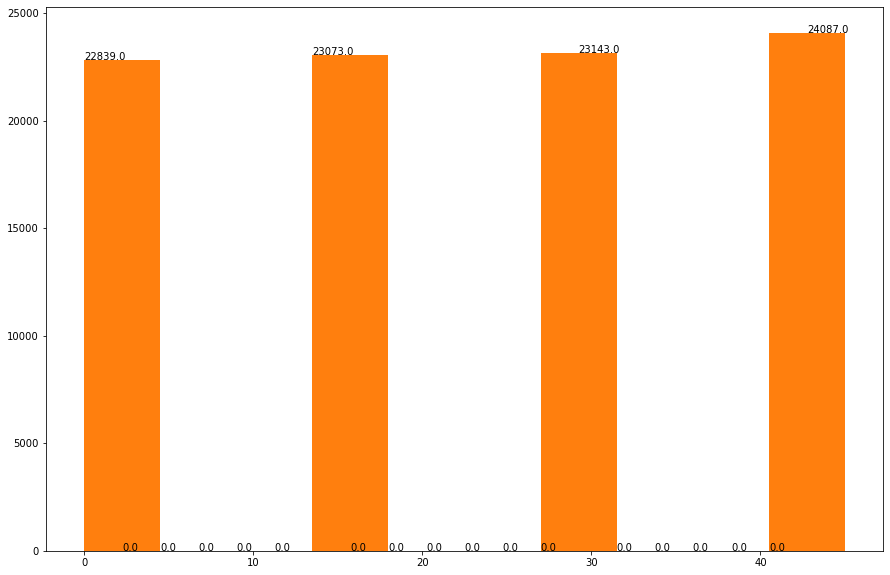

In [81]:
#plot
fig = plt.figure(figsize = (15,10))
your_bins=20
arr=plt.hist(loginset.T, bins=your_bins)
for i in range(your_bins):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i]))
plt.hist(loginset.T, bins=10)

This is just another idea of how I can use my data to inveestigate patterns

In [19]:
#count duplicates
dups_values = loginset.pivot_table(index=['mins'], aggfunc='size')
print (dups_values)

mins
0     22839
15    23073
30    23143
45    24087
dtype: int64


Finding the demand time

In [70]:
#dups_values = loginset.groupby('login_time')['mins'].agg('count').pipe(pd.DataFrame).rename(columns = {'value': 'frequency'})

In [22]:
dups_values.head()

mins
0     22839
15    23073
30    23143
45    24087
dtype: int64

In [45]:
histo = dups_values.groupby('mins').count()

In [51]:
loginset.groupby('login_time').count()

,mins
login_time,
1970-01-01 20:12:16,1
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:36,1
1970-01-01 20:16:37,1
...,...
1970-04-13 18:48:52,1
1970-04-13 18:50:19,1
1970-04-13 18:54:02,1


In [ ]:
histog = df.groupby('login_time').mins.count()